# Granule Cell

/Users/anatolii-sorokin/opt/miniconda3/envs/sushibelt/lib/python3.10/site-packages/PyNeuronToolbox-0.1-py3.10.egg/PyNeuronToolbox/morphology.py:302: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.


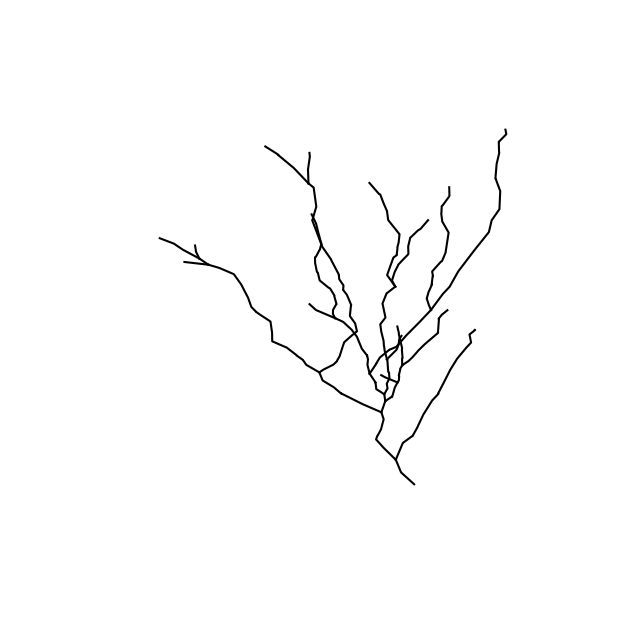

In [1]:
from neuron import h
from PyNeuronToolbox import neuromorpho,morphology
import pylab as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm
import numpy as np
from palettable.cubehelix import Cubehelix

u_cmap = cm.cool
us_cmap = Cubehelix.make(start=1, min_light=0.0, max_light=0.9, max_sat=6.0, rotation=0.13,n=256).mpl_colormap

fig = plt.figure(figsize=(8,8))
xsc = np.array([0,100])
ysc = np.array([0,0])
view = (-90,90)

cellname = 'dgyrus'
#cellname = 'granule'
#neuromorpho.download('041015-vehicle1', filename=cellname+'_morph.swc')
#cell = morphology.load(cellname+'_morph.swc',use_axon=False)
dirname = 'neuromorpho'
filename = 'DD13-67-c8-1.CNG.swc'
#neuromorpho.download('DD13-67-c8-1', filename=cellname+'_morph.swc')
cell = morphology.load(cellname+'_morph.swc',use_axon=False)
#cell = morphology.load(dirname+'/'+filename,use_axon=False)

ax = plt.subplot(111, projection='3d')
#ax = fig.gca(projection='3d')
morphology.shapeplot(h, ax, sections=cell.dend, color='k')
#morphology.mark_locations(h,cell.soma[0], 0.1, color='k', ms=1)
#ax.plot(xsc,ysc,'-r',lw=2)
#ax.plot(ysc,xsc,'-r',lw=2)
#ax.view_init(elev=80,azim=-90)
ax.view_init(*view)
ax.set_axis_off()
plt.savefig(cellname+'_morph.eps')
plt.show()

In [2]:
?morphology.shapeplot

Signature:
morphology.shapeplot(
    h,
    ax,
    sections=None,
    order='pre',
    cvals=None,
    clim=None,
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x10ab94c40>,
    **kwargs,
)
Docstring:
Plots a 3D shapeplot

Args:
    h = hocObject to interface with neuron
    ax = matplotlib axis for plotting
    sections = list of h.Section() objects to be plotted
    order = { None= use h.allsec() to get sections
              'pre'= pre-order traversal of morphology }
    cvals = list/array with values mapped to color by cmap; useful
            for displaying voltage, calcium or some other state
            variable across the shapeplot.
    **kwargs passes on to matplotlib (e.g. color='r' for red lines)

Returns:
    lines = list of line objects making up shapeplot
File:      ~/opt/miniconda3/envs/sushibelt/lib/python3.10/site-packages/PyNeuronToolbox-0.1-py3.10.egg/PyNeuronToolbox/morphology.py
Type:      function

In [ ]:
ax = plt.subplot(111, projection='3d')
#ax = fig.gca(projection='3d')
#morphology.shapeplot(h, ax, sections=cell.dend, color='k')
morphology.shapeplot(h, ax, color='k')
#morphology.mark_locations(h,cell.soma[0], 0.1, color='k', ms=1)
#ax.plot(xsc,ysc,'-r',lw=2)
#ax.plot(ysc,xsc,'-r',lw=2)
ax.view_init(elev=80,azim=-90)
#ax.view_init(*view)
ax.set_axis_off()
#plt.savefig(cellname+'_morph.eps')
plt.show()

In [ ]:
?ax.view_init

In [3]:
from PyNeuronToolbox.morphology import dist_between,allsec_preorder
import pandas as pd

def dist_to_soma(segment):
    return dist_between(h,allsec_preorder(h)[0](0.5),segment)

#seglist in pre-order
sec_list = allsec_preorder(h)
seg_list = []
for sec in sec_list:
    if sec.name() != 'dgyrus_morph.soma[0]':
        nseg = int(np.round(sec.L/3.7))
        locs = np.linspace(0,1,nseg+2)[1:-1]
        for loc in locs:
            seg_list.append(sec(loc))
    else:
        locs = np.linspace(0,1,3)[1:-1]
        for loc in locs:
            seg_list.append(sec(loc))
n = len(seg_list)
N = n
tdf=pd.read_csv('data/DG_seg_mapping.csv')
abbDG=tdf['abb']
abbT={}
segIdx={}
for i in range(N):
    abbT[abbDG[i]] = 1+ abbT.get(abbDG[i],0)
    ll=segIdx.get(abbDG[i],[])
    ll.append(i)
    segIdx[abbDG[i]] = ll


In [4]:
(len(sec_list),len(seg_list),seg_list[286])

(32, 287, dgyrus_morph.dend[5](0.909091))

In [ ]:
sg=seg_list[286]
sg.sec

In [ ]:
(sec_list,seg_list)

In [ ]:
def snap_ss(name,u,clim=[0,0.0035],cmap=plt.cm.cool,elev=80,azim=-90):
    #u = utrace[n:,:]
    fig = plt.figure(figsize=(8,18))
    shapeax = plt.subplot(111, projection='3d')
    lines = morphology.shapeplot(h,shapeax,cvals=u,clim=clim,\
                      cmap=cmap,order='pre',lw=2)
    #shapeax.view_init(*view)
    shapeax.view_init(elev=elev,azim=azim)
    plt.title('steady-state',fontweight='bold',fontsize=14)

    # colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(clim[0],clim[1])) 
    #sm = plt.cm.ScalarMappable(cmap=plt.cm.cool, norm=plt.Normalize(clim[0],clim[1])) 
    #sm._A = []
    #plt.colorbar(sm, shrink=0.5)
    #plt.colorbar(sm,cax=shapeax)
    #plt.colorbar()
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(name+'.svg')
utarg = np.ones(len(seg_list))
#abbs = [k for k in segIdx.keys()]
abbs = ['rd1', 'rd2', 'rd3', 'rd4', 'rd5', 'rd6', 'rd7', 'rd8', 'rd9', 'rd10']
for i in range(len(abbs)):
    abb = abbs[i]
    sidx= segIdx[abb]
    utarg[sidx] *= i
u1 = np.concatenate((utarg,utarg))
utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss("DG_segment_distribution",utarg,clim=[0,max(utarg)],cmap=plt.cm.YlOrBr)


In [ ]:
sec_segs={}
for i in range(len(seg_list)):
    sec = seg_list[i].sec
    ll = sec_segs.get(sec,[])
    ll.append(utarg[i])
    sec_segs[sec] = ll

sec_val=np.zeros(len(sec_list))
for i in range(len(sec_list)):
    ll = sec_segs.get(sec_list[i])
    sec_val[i] = np.mean(ll)

sec_val

In [ ]:
(len(sec_list),sum([sec.nseg for sec in sec_list]),[sec.nseg for sec in sec_list])

In [ ]:
utrace.shape

In [ ]:
u1 = np.concatenate((sec_val,sec_val))
utrace = [u1,u1]
utrace = np.array(utrace).T
snap_ss("DG_segment_distribution",sec_val,clim=[0,10],cmap=plt.cm.YlOrBr)


In [ ]:
snap_ss("DG_segment_distribution",sec_val,clim=[0,10],cmap=plt.cm.YlOrBr,elev=100,azim=-80)

In [ ]:
(i,max(utarg),len(abbs),abbs,utarg.shape,max(utarg),min(utarg))

In [ ]:
utarg

In [ ]:
secL=np.zeros(len(sec_list))
secD=np.zeros(len(sec_list))
segL=np.zeros(len(sec_list))
for i in range(len(sec_list)):
    sec = sec_list[i]
    secL[i]=sec.L
    secD[i]=sec.diam
    segL[i]=sec.L/sec.nseg
    print(f"{i}: {sec.name()}, nseg={sec.nseg}, L={sec.L}, D={sec.diam}, l={sec.L/sec.nseg}, or={sec.orientation()}, hname={sec.hname()}")
segA=h.PI*secD*segL
segV=h.PI*secD**2*segL/4


In [ ]:
x=np.array(range(len(sec_list)),dtype=int)
plt.plot(x,segL,label='length')
plt.plot(x,secD,label='diameter')
#plt.plot(x,segA,label='area')
#plt.plot(x,segV,label='volume')
plt.ylabel('Value')
plt.xlabel('Section number')
# show a legend on the plot
plt.legend()
plt.show()

# Without Reattachment

In [ ]:
import sushi

A,u,t,err,final_err = sushi.run_uniform_sim(h, 8e-5, 10.0)
sushi.snapshots(h,u,t,'plots/no_reattach',cellname,view,u_cmap,us_cmap)
N = int(A.shape[1] / 2)
tss = sushi.calc_time_to_ss(A, u[0,:])
np.savetxt('./data/no_reattach/'+cellname+'_pt.txt',np.array([tss, err[-1]]))

print 'mean percent error  = %2.2f'%(err[-1])
print 'time to reach within 10 perc of ss: %f min'%(tss/60)

In [ ]:
# Animation to show distribution on the microtubules
from PyNeuronToolbox.morphology import shapeplot_animate
from JSAnimation import IPython_display
from matplotlib import animation

clim = [0,2]
nframes = u.shape[0]

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')
lines = morphology.shapeplot(h,ax,order='pre',lw=2)
ax.view_init(*view)
ax.set_axis_off()
plt.title('cargo on microtubles over (log) time',fontweight='bold',fontsize=14)

# Hack to get a colorbar
# http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap=u_cmap, norm=plt.Normalize(clim[0],clim[1])) 
sm._A = []
plt.colorbar(sm, shrink=0.5)
plt.tight_layout()

#plt.show()
anim_func = morphology.shapeplot_animate(u[:,:N],lines,nframes,clim=clim,cmap=u_cmap)
anim = animation.FuncAnimation(fig, anim_func, frames=nframes, interval=400)
anim.save('./anim/with_reattach/'+cellname+'_u.mp4'); anim

In [ ]:
# Animation to show detached distribution
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')
lines = morphology.shapeplot(h,ax,order='pre',lw=2)
ax.view_init(*view)
ax.set_axis_off()
plt.title('detached cargo over (log) time',fontweight='bold',fontsize=14)

# Hack to get a colorbar
# http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap=us_cmap, norm=plt.Normalize(clim[0],clim[1])) 
sm._A = []
plt.colorbar(sm, shrink=0.5)
plt.tight_layout()

#plt.show()
anim_func = morphology.shapeplot_animate(u[:,N:],lines,nframes,clim=clim,cmap=us_cmap)
anim = animation.FuncAnimation(fig, anim_func, frames=nframes, interval=400)
anim.save('./anim/no_reattach/'+cellname+'_us.mp4'); anim

In [ ]:
cols = [ 'r' if abs(e)>0.25 else 'b' for e in final_err ]
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')
lines = morphology.shapeplot(h,ax,order='pre',lw=2,cvals=cols)
ax.view_init(*view)
ax.set_axis_off()
plt.title('compartments with >25% error',fontweight='bold',fontsize=14)
plt.savefig('./plots/no_reattach/granule_final_err.eps')

In [ ]:
plt.figure()
palette = ['#bfd3e6','#9ebcda','#8c96c6','#8c6bb1','#88419d','#6e016b']
detach_timescale = np.round(np.logspace(-4,-6,len(palette)),6)
err = []
for i in range(len(detach_timescale)):
    A,u,t,err_,ferr = sushi.run_uniform_sim(h, detach_timescale[i], 10.0)
    plt.plot(t/60,err_,'.-',color=palette[i],lw=2, label=detach_timescale[i])
    err.append(err_)

plt.xscale('log')
plt.ylabel('mean error (%)')
plt.xlabel('time (mins)')
plt.ylim([0,100])
plt.legend(loc='best')
plt.title('Error vs time (color indicates detachment rate)')
plt.show()

In [ ]:
tradeoff = sushi.calc_tradeoff_curve(h,diff_coeff=10.0)
np.savetxt('./data/no_reattach/'+cellname+'_tradeoff.txt',tradeoff)

plt.figure()
dcs = np.round(np.logspace(0,1.2,6))
for i in range(len(palette)):
    tradeoff = sushi.calc_tradeoff_curve(h,diff_coeff=dcs[i])
    plt.plot(tradeoff[:,0],tradeoff[:,1],'-',lw=2,color=palette[i])
plt.xscale('log')
plt.xlim([1e0,1e5])
plt.ylim([1,100])
plt.xlabel('mins to reach 10% of ss')
plt.ylabel('mean percent error')
plt.title('tradeoff curves (color indicates diffusion coeffs in um^2/s)')
plt.legend(dcs)
plt.show()

# With Reattachment

In [ ]:
A,u,t,excess,err = sushi.run_uniform_reattachment(h, 0.1, 10.0)
sushi.snapshots(h,u,t,'plots/with_reattach',cellname,view,u_cmap,us_cmap)
print 'excess cargo = %2.1f percent'%(excess[-1])

In [ ]:
# Animation to show distribution on the microtubules
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')
lines = morphology.shapeplot(h,ax,order='pre',lw=2)
ax.view_init(*view)
ax.set_axis_off()
plt.title('cargo on microtubles over (log) time',fontweight='bold',fontsize=14)

# Hack to get a colorbar
# http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap=u_cmap, norm=plt.Normalize([0,0.2])) 
sm._A = []
plt.colorbar(sm, shrink=0.5)
plt.tight_layout()

#plt.show()
anim_func = morphology.shapeplot_animate(u[:,:N],lines,nframes,clim=[0,0.2],cmap=u_cmap)
anim = animation.FuncAnimation(fig, anim_func, frames=nframes, interval=400)
anim.save('./anim/with_reattach/'+cellname+'_u.mp4'); anim

In [ ]:
# Animation to show detached distribution
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='3d')
lines = morphology.shapeplot(h,ax,order='pre',lw=2)
ax.view_init(*view)
ax.set_axis_off()
plt.title('detached cargo over (log) time',fontweight='bold',fontsize=14)

# Hack to get a colorbar
# http://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots
sm = plt.cm.ScalarMappable(cmap=us_cmap, norm=plt.Normalize(clim[0],clim[1])) 
sm._A = []
plt.colorbar(sm, shrink=0.5)
plt.tight_layout()

#plt.show()
anim_func = morphology.shapeplot_animate(u[:,N:],lines,nframes,clim=clim,cmap=us_cmap)
anim = animation.FuncAnimation(fig, anim_func, frames=nframes, interval=400)
anim.save('./anim/with_reattach/'+cellname+'_us.mp4'); anim

In [ ]:
plt.figure()
detach_timescale = np.round(np.logspace(-2,-4,len(palette)),6)
err = []
for i in range(len(detach_timescale)):
    A,u,t,exc_,err_ = sushi.run_uniform_reattachment(h, detach_timescale[i], 10.0)
    print 'excess: %g \t reattachment: %g'%(exc_[-1], detach_timescale[i])
    plt.plot(t/60,err_,'.-',color=palette[i],lw=2, label=detach_timescale[i])
    err.append(err_)

plt.xscale('log')
plt.ylabel('mean error (%)')
plt.xlabel('time (mins)')
plt.ylim([0,100])
plt.legend(loc='best')
plt.title('Error vs time (color indicates reattachment rate)')
plt.show()

In [ ]:
tradeoff = sushi.calc_tradeoff_reattachment(h,diff_coeff=10.0)
np.savetxt('./data/with_reattach/'+cellname+'_tradeoff.txt',tradeoff)

plt.figure()
dcs = np.round(np.logspace(0,1.2,6))
for i in range(len(palette)):
    tradeoff = sushi.calc_tradeoff_reattachment(h,diff_coeff=dcs[i])
    x,y = tradeoff[:,0],tradeoff[:,1]
    plt.plot(x[y<98],y[y<98],'-',lw=2,color=palette[i])
plt.xscale('log')
plt.xlim([1e0,1e5])
plt.ylim([1,100])
plt.xlabel('mins to reach 10% of ss')
plt.ylabel('excess cargo (%)')
plt.title('tradeoff curves for diff diffusion coeffs')
plt.legend(dcs)
plt.show()